In [ ]:
# 📌 AUTHOR: Kunda Oliver
# Analysis of Cowpea Mutants under Drought & Low Phosphorus
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
# @title Cleaning and Descriptive stats
# ----------------------------
# 1. Load Dataset
# ----------------------------
df = pd.read_excel("/content/data.gh.csv")  # Make sure this is the correct path

# ----------------------------
# 2. Clean & Preview Data
# ----------------------------
# Standardize column names
df.columns = [col.strip().upper() for col in df.columns]
df = df.rename(columns={
    'GNTP': 'GENOTYPE',
    'PLEV': 'P',
    'MLEV': 'M'
})
df = df.dropna()
print("\nColumns after cleaning:", df.columns.tolist())

# ----------------------------
# 3. Descriptive Stats
# ----------------------------
print("\nSummary Statistics:\n", df.describe())



Columns after cleaning: ['GENOTYPE', 'M', 'P', 'REP', 'NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']

Summary Statistics:
                 M           P         REP        NTRL        NOBR        PLHT  \
count  123.000000  123.000000  123.000000  123.000000  123.000000  123.000000   
mean    67.317073   50.804878    1.983740    5.268293    4.560976   80.211382   
std     24.994202   28.608052    0.819673    1.403001    1.594799   33.413272   
min     40.000000   23.000000    1.000000    2.000000    1.000000   23.000000   
25%     40.000000   23.000000    1.000000    4.000000    4.000000   48.000000   
50%     60.000000   23.000000    2.000000    5.000000    5.000000   84.000000   
75%    100.000000   80.000000    3.000000    6.000000    6.000000  103.000000   
max    100.000000   80.000000    3.000000    9.000000    8.000000  159.000000   

             STMD         RTD        PTBM        RTBM        PLDY       

In [ ]:
# @title ANOVA
from statsmodels.formula.api import ols
import statsmodels.api as sm

print("\n📌 One-Way ANOVA Across Genotypes with Group Means")

# Traits to analyze
available_traits = ['NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']

available_traits = [trait for trait in available_traits if trait in df.columns]

print("\nTraits to analyze:", available_traits)

for trait in available_traits:
    try:
        print(f"\n📊 ANOVA for {trait} (by GENOTYPE):")

        # ANOVA
        model = ols(f'{trait} ~ C(GENOTYPE)', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(anova_table)

        # Means per genotype
        print(f"\n📌 Mean {trait} per Genotype:")
        print(df.groupby("GENOTYPE")[trait].mean().round(2).sort_values(ascending=False))

    except Exception as e:
        print(f"\n⚠️ Error analyzing {trait}: {str(e)}")



📌 One-Way ANOVA Across Genotypes with Group Means

Traits to analyze: ['NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']

📊 ANOVA for NTRL (by GENOTYPE):
                 sum_sq     df         F    PR(>F)
C(GENOTYPE)   18.333024    6.0  1.597913  0.153879
Residual     221.813317  116.0       NaN       NaN

📌 Mean NTRL per Genotype:
GENOTYPE
BB 3-9-7-5      6.11
LT 11-3-3-12    5.39
BB PRT          5.28
BB 8 -1 -5-2    5.12
LT PRT          5.06
MS PRT          5.06
MS 1-8-1-4      4.83
Name: NTRL, dtype: float64

📊 ANOVA for NOBR (by GENOTYPE):
                 sum_sq     df         F    PR(>F)
C(GENOTYPE)   18.209350    6.0  1.205298  0.308545
Residual     292.083333  116.0       NaN       NaN

📌 Mean NOBR per Genotype:
GENOTYPE
BB 8 -1 -5-2    5.00
BB 3-9-7-5      4.94
MS 1-8-1-4      4.89
LT 11-3-3-12    4.67
LT PRT          4.28
MS PRT          4.12
BB PRT          4.00
Name: NOBR, dtype: float64

📊 ANOVA for PL

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

print("\n📌 Stratified ANOVA: Genotype Performance Within Each Treatment Level")

# Traits to analyze
available_traits = ['NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']
available_traits = [trait for trait in available_traits if trait in df.columns]

# Treatment levels
phosphorus_levels = sorted(df['P'].unique())
moisture_levels = sorted(df['M'].unique())

# 🔁 Loop over each trait
for trait in available_traits:
    print(f"\n===========================\n📊 Trait: {trait}\n===========================")

    # --- ANOVA within each phosphorus level ---
    for p_level in phosphorus_levels:
        subset = df[df['P'] == p_level]
        print(f"\n🔍 ANOVA for {trait} at Phosphorus = {p_level}")
        try:
            model = ols(f'{trait} ~ C(GENOTYPE)', data=subset).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            print(anova_table)

            print(f"\n📌 Mean {trait} per Genotype (P = {p_level}):")
            print(subset.groupby("GENOTYPE")[trait].mean().round(2).sort_values(ascending=False))
        except Exception as e:
            print(f"⚠️ Skipped P={p_level}: {e}")

    # --- ANOVA within each moisture level ---
    for m_level in moisture_levels:
        subset = df[df['M'] == m_level]
        print(f"\n💧 ANOVA for {trait} at Moisture = {m_level}")
        try:
            model = ols(f'{trait} ~ C(GENOTYPE)', data=subset).fit()
            anova_table = sm.stats.anova_lm(model, typ=2)
            print(anova_table)

            print(f"\n📌 Mean {trait} per Genotype (M = {m_level}):")
            print(subset.groupby("GENOTYPE")[trait].mean().round(2).sort_values(ascending=False))
        except Exception as e:
            print(f"⚠️ Skipped M={m_level}: {e}")



📌 Stratified ANOVA: Genotype Performance Within Each Treatment Level

📊 Trait: NTRL

🔍 ANOVA for NTRL at Phosphorus = 23
                sum_sq    df         F    PR(>F)
C(GENOTYPE)  17.415476   6.0  1.653041  0.149831
Residual     98.330556  56.0       NaN       NaN

📌 Mean NTRL per Genotype (P = 23):
GENOTYPE
LT 11-3-3-12    5.90
BB 3-9-7-5      5.44
BB 8 -1 -5-2    5.38
BB PRT          5.11
LT PRT          4.67
MS 1-8-1-4      4.44
MS PRT          4.44
Name: NTRL, dtype: float64

🔍 ANOVA for NTRL at Phosphorus = 80
                sum_sq    df         F    PR(>F)
C(GENOTYPE)  24.181746   6.0  2.253184  0.052045
Residual     94.801587  53.0       NaN       NaN

📌 Mean NTRL per Genotype (P = 80):
GENOTYPE
BB 3-9-7-5      6.78
MS PRT          5.86
BB PRT          5.44
LT PRT          5.44
MS 1-8-1-4      5.22
BB 8 -1 -5-2    4.89
LT 11-3-3-12    4.75
Name: NTRL, dtype: float64

💧 ANOVA for NTRL at Moisture = 40
                sum_sq    df         F    PR(>F)
C(GENOTYPE)  16.410256   

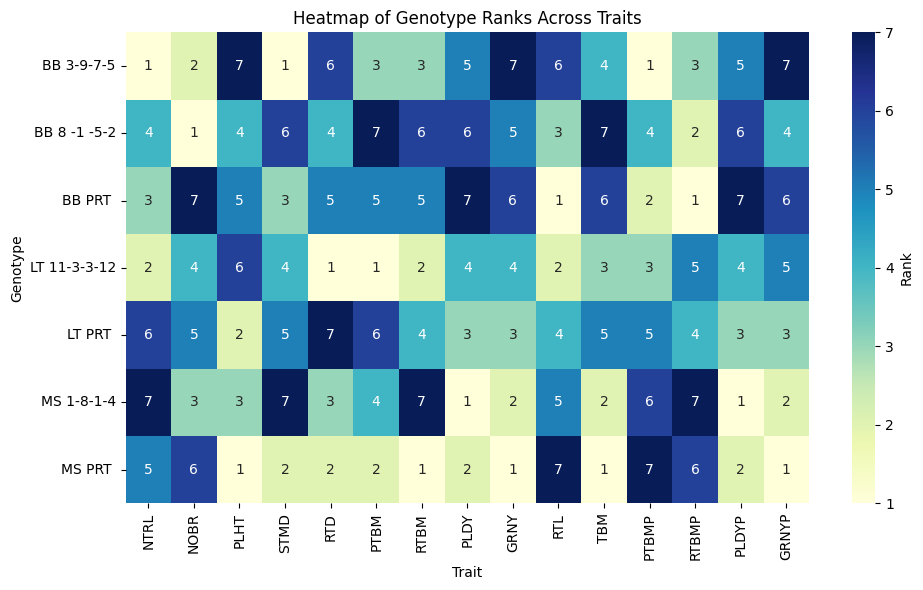

In [ ]:
# ----------------------------
# @title Heatmaps of Genotype Performance Ranks Across Traits
# ----------------------------

# Traits to analyze
traits = ['NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']


# Calculate mean per genotype
mean_performance = df.groupby("GENOTYPE")[traits].mean()

# Rank the genotypes for each trait
rank_df = mean_performance.rank(ascending=False)

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rank_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Rank'})
plt.title("Heatmap of Genotype Ranks Across Traits")
plt.xlabel("Trait")
plt.ylabel("Genotype")
plt.tight_layout()
plt.show()


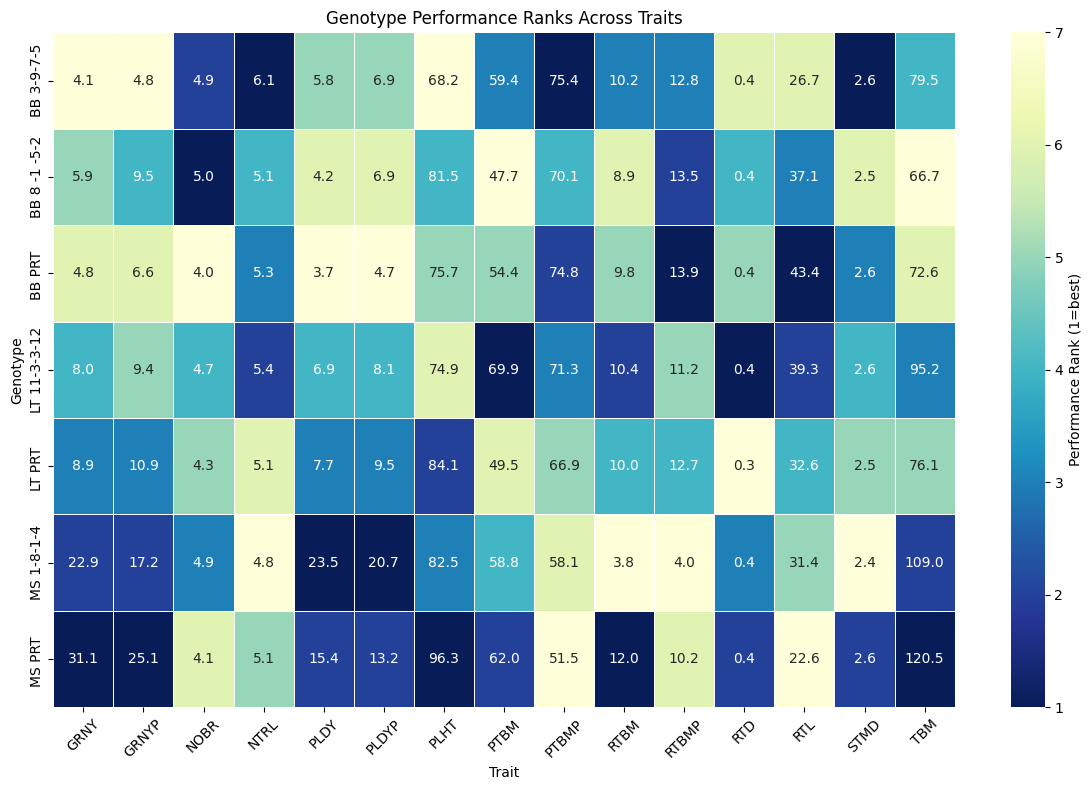

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_heatmap(df_long):
    """
    Plot a heatmap of genotype performance ranks across traits.
    Expects a long-format dataframe with columns: 'Genotype', 'Trait', 'Value'
    """
    # Calculate mean performance for each genotype-trait combination
    mean_perf = df_long.groupby(['Genotype', 'Trait'])['Value'].mean().unstack()

    # Rank genotypes within each trait (1=best)
    ranks = mean_perf.rank(ascending=False, method='min')

    # Plot heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(ranks, annot=mean_perf.round(1), fmt='', cmap='YlGnBu_r',
                cbar_kws={'label': 'Performance Rank (1=best)'}, linewidths=0.5)
    plt.title('Genotype Performance Ranks Across Traits')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Traits to include
traits = ['NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']

# Melt wide dataframe to long format
df_long = df.melt(id_vars=['GENOTYPE'], value_vars=traits,
                  var_name='Trait', value_name='Value')

# Rename for compatibility with plot_heatmap
df_long = df_long.rename(columns={'GENOTYPE': 'Genotype'})

# Plot the heatmap
plot_heatmap(df_long)


<Figure size 800x500 with 0 Axes>

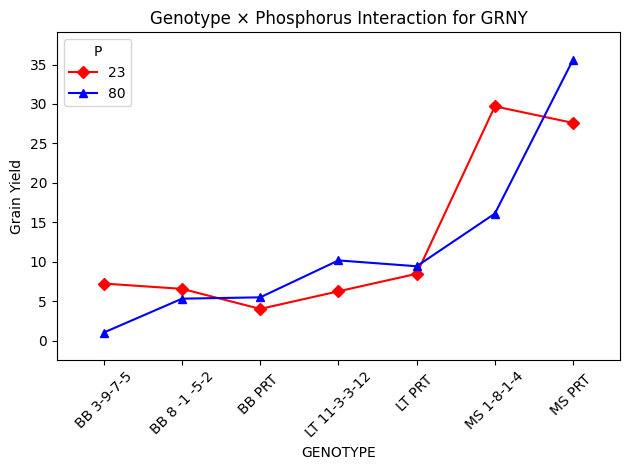

<Figure size 800x500 with 0 Axes>

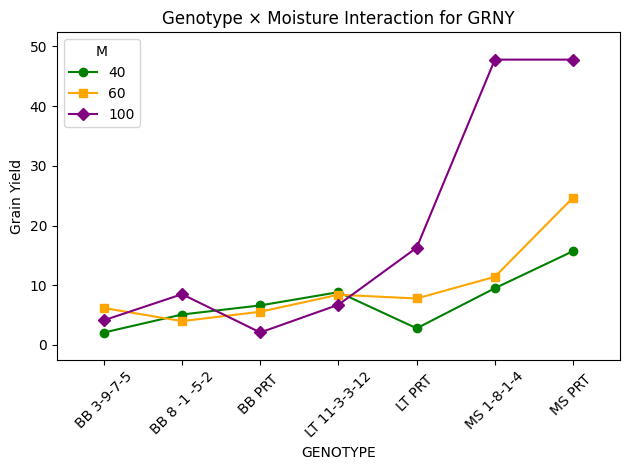

In [ ]:
# @title Interaction Plots: Genotype × Treatment Effects
from statsmodels.graphics.factorplots import interaction_plot

# Example for GRNY vs Phosphorus
plt.figure(figsize=(8, 5))
interaction_plot(df['GENOTYPE'], df['P'], df['GRNY'], colors=['red', 'blue'], markers=['D', '^'], ms=6)
plt.title("Genotype × Phosphorus Interaction for GRNY")
plt.ylabel("Grain Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Example for GRNY vs Moisture
plt.figure(figsize=(8, 5))
interaction_plot(df['GENOTYPE'], df['M'], df['GRNY'], colors=['green', 'orange', 'purple'], markers=['o', 's', 'D'], ms=6)
plt.title("Genotype × Moisture Interaction for GRNY")
plt.ylabel("Grain Yield")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# @title Radar Charts Comparing Top-Performing Genotypes
import plotly.express as px
import plotly.graph_objects as go
import numpy as np

# Select top 3 genotypes by TBM
top_genotypes = df.groupby('GENOTYPE')['TBM'].mean().sort_values(ascending=False).head(3).index.tolist()

# Normalize data [0-1]
norm_df = df.groupby('GENOTYPE')[traits].mean()
norm_df = (norm_df - norm_df.min()) / (norm_df.max() - norm_df.min())
top_norm = norm_df.loc[top_genotypes]

# Radar chart
fig = go.Figure()

for geno in top_genotypes:
    fig.add_trace(go.Scatterpolar(
        r=top_norm.loc[geno].values,
        theta=traits,
        fill='toself',
        name=geno
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title="Radar Chart of Top Genotypes"
)
fig.show()


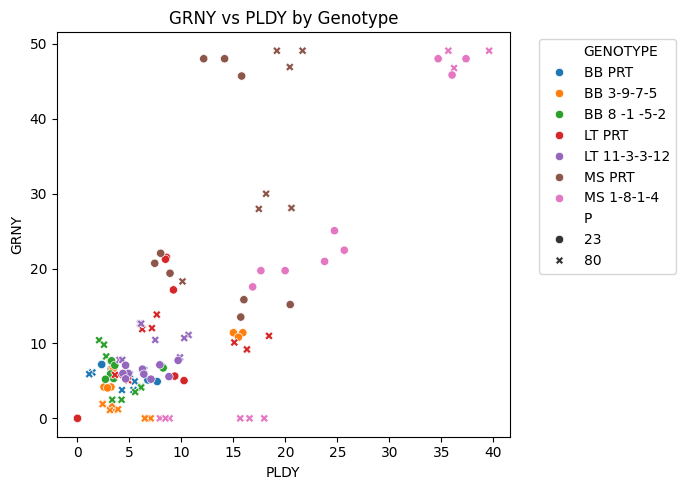

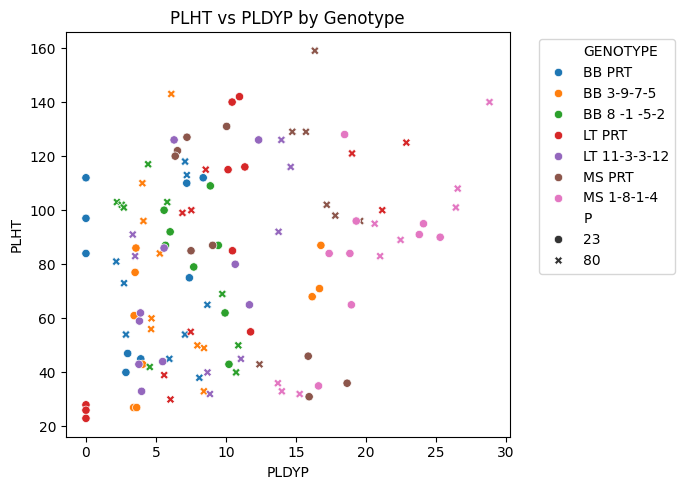

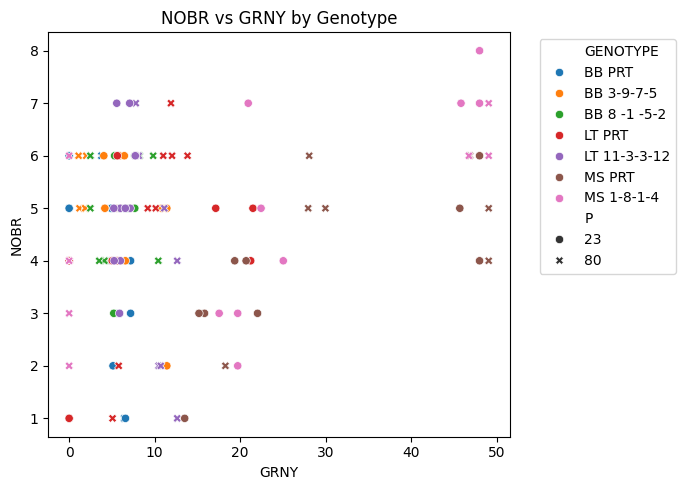

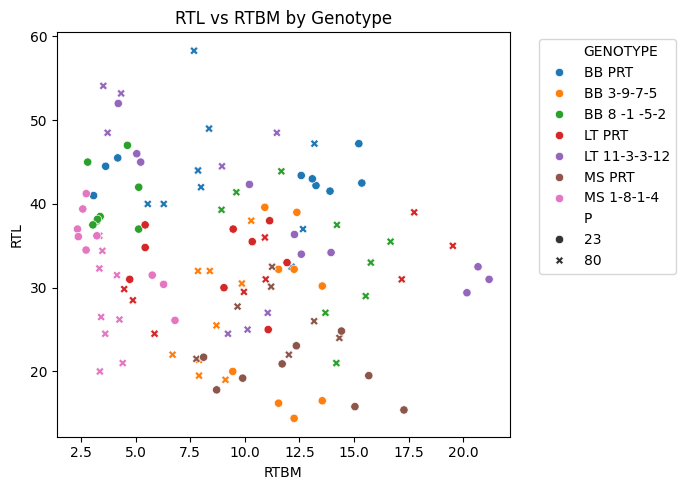

In [ ]:
# @title Scatter Plots of Yield Components vs Root Traits
traits = ['NTRL', 'NOBR', 'PLHT', 'STMD', 'RTD', 'PTBM', 'RTBM', 'PLDY', 'GRNY', 'RTL', 'TBM', 'PTBMP', 'RTBMP', 'PLDYP', 'GRNYP']
scatter_traits = [
    ('GRNY', 'PLDY'),
    ('PLHT', 'PLDYP'),
    ('NOBR', 'GRNY'),
    ('RTL','RTBM')
]

for y_trait, x_trait in scatter_traits:
    plt.figure(figsize=(7, 5))
    sns.scatterplot(data=df, x=x_trait, y=y_trait, hue='GENOTYPE', style='P', palette='tab10')
    plt.title(f"{y_trait} vs {x_trait} by Genotype")
    plt.xlabel(x_trait)
    plt.ylabel(y_trait)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [ ]:
# ----------------------------
# @title 5. Tukey HSD for Genotypes
# ----------------------------
for trait in available_traits:
    try:
        tukey = pairwise_tukeyhsd(endog=df[trait], groups=df['GENOTYPE'], alpha=0.05)
        print(f"\n📌 Tukey HSD for {trait} by Genotype:\n")
        print(tukey.summary())
    except Exception as e:
        print(f"\n⚠️ Error in Tukey HSD for {trait}: {str(e)}")



📌 Tukey HSD for NTRL by Genotype:

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
  BB 3-9-7-5 BB 8 -1 -5-2  -0.9935 0.3456 -2.3968 0.4099  False
  BB 3-9-7-5      BB PRT   -0.8333 0.5455 -2.2165 0.5498  False
  BB 3-9-7-5 LT 11-3-3-12  -0.7222 0.7035 -2.1054 0.6609  False
  BB 3-9-7-5      LT PRT   -1.0556 0.2578 -2.4387 0.3276  False
  BB 3-9-7-5   MS 1-8-1-4  -1.2778 0.0903 -2.6609 0.1054  False
  BB 3-9-7-5      MS PRT   -1.0486 0.2999 -2.4743 0.3771  False
BB 8 -1 -5-2      BB PRT    0.1601 0.9999 -1.2432 1.5635  False
BB 8 -1 -5-2 LT 11-3-3-12   0.2712 0.9973 -1.1321 1.6746  False
BB 8 -1 -5-2      LT PRT   -0.0621    1.0 -1.4654 1.3413  False
BB 8 -1 -5-2   MS 1-8-1-4  -0.2843 0.9965 -1.6877  1.119  False
BB 8 -1 -5-2      MS PRT   -0.0551    1.0 -1.5005 1.3902  False
     BB PRT  LT 11-3-3-12   0.1111    1.0  -1.272 1.4943  False
    

<ipython-input-21-3681974485>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-3681974485>:19: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.


<ipython-input-21-3681974485>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-3681974485>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-21-3681974485>:30: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same 

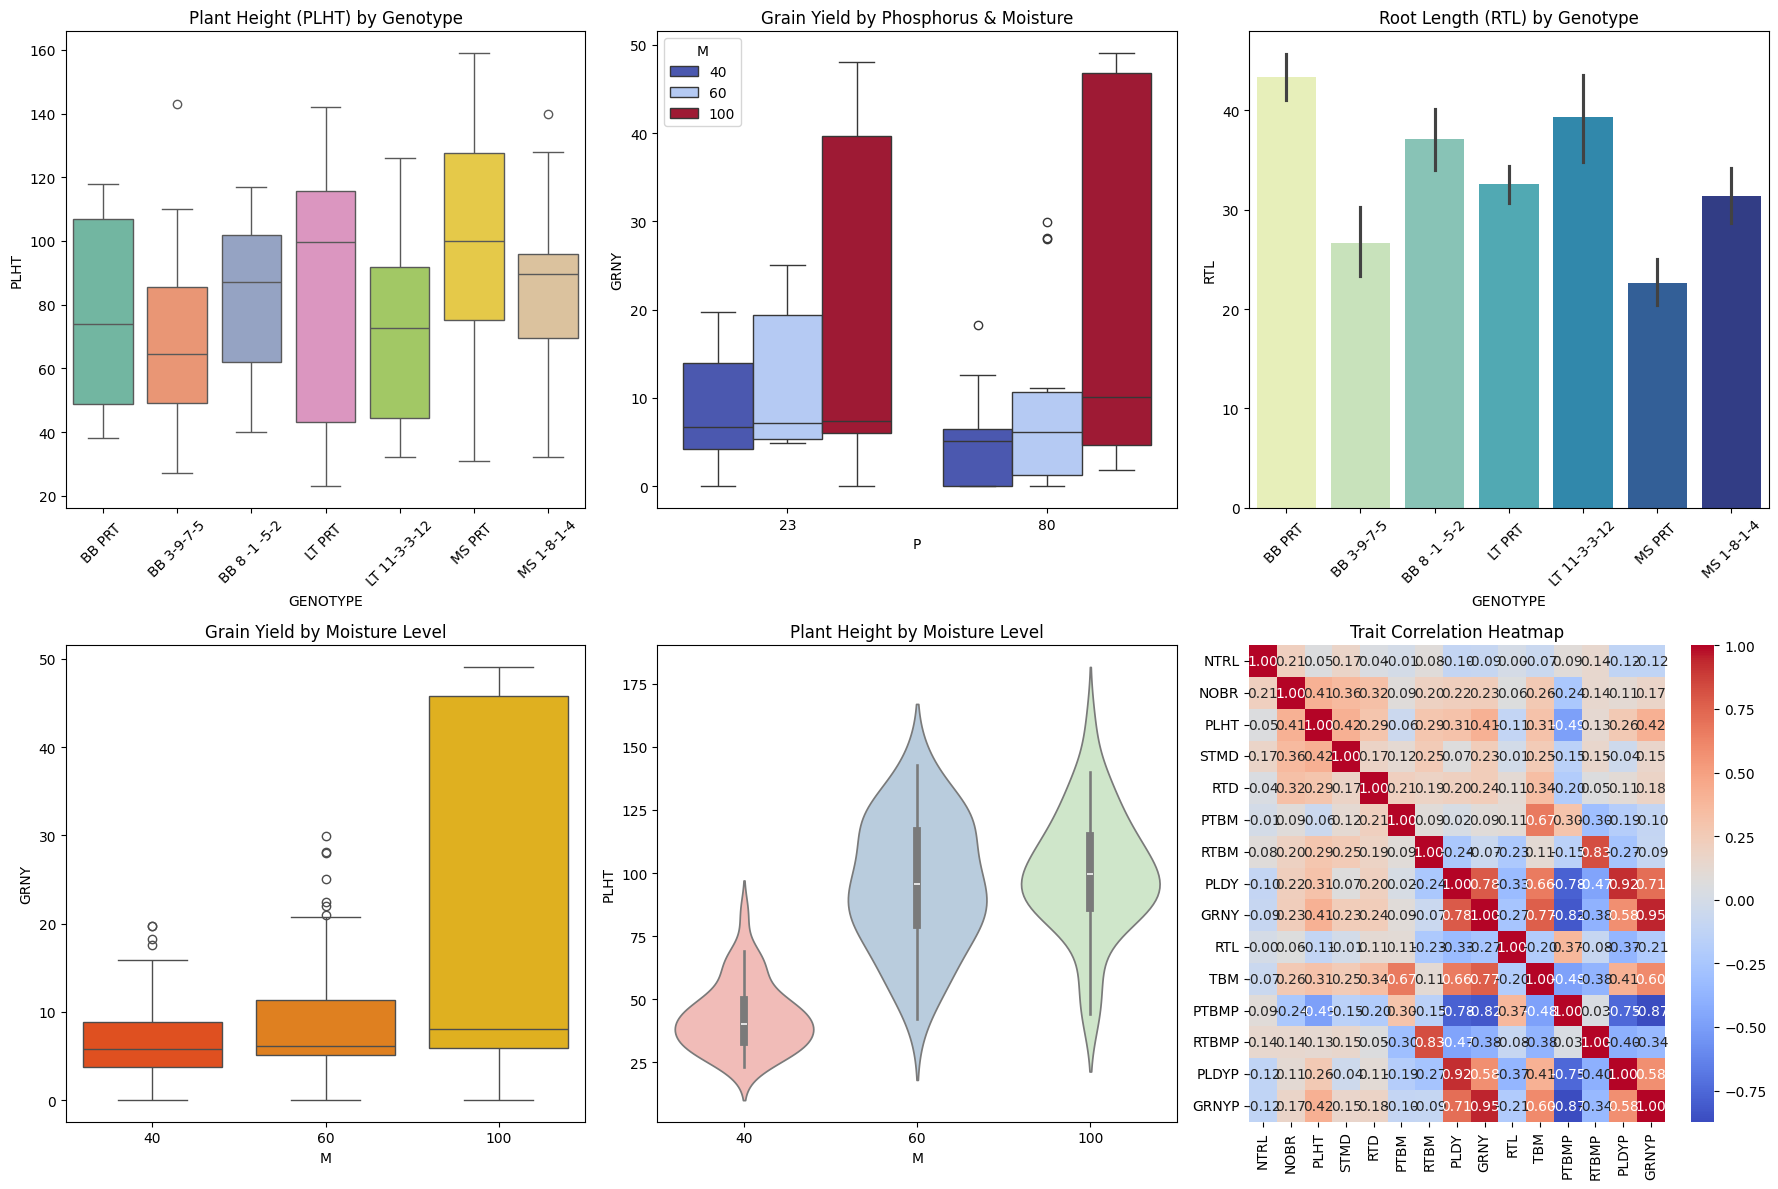

In [ ]:
# ----------------------------
# @title 6. Visualization Section (Updated for available traits)
# ----------------------------
plt.figure(figsize=(18, 12))

# A. Plant Height by Genotype
plt.subplot(2, 3, 1)
sns.boxplot(data=df, x="GENOTYPE", y="PLHT", palette="Set2")
plt.title("Plant Height (PLHT) by Genotype")
plt.xticks(rotation=45)

# B. Grain Yield by Phosphorus & Moisture
plt.subplot(2, 3, 2)
sns.boxplot(data=df, x="P", y="GRNY", hue="M", palette="coolwarm")
plt.title("Grain Yield by Phosphorus & Moisture")

# C. Root Length by Genotype
plt.subplot(2, 3, 3)
sns.barplot(data=df, x="GENOTYPE", y="RTL", ci=95, palette="YlGnBu")
plt.title("Root Length (RTL) by Genotype")
plt.xticks(rotation=45)

# D. Grain Yield by Moisture
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x="M", y="GRNY", palette="autumn")
plt.title("Grain Yield by Moisture Level")

# E. Plant Height by Moisture
plt.subplot(2, 3, 5)
sns.violinplot(data=df, x="M", y="PLHT", palette="Pastel1")
plt.title("Plant Height by Moisture Level")

# F. Heatmap of Trait Correlation
plt.subplot(2, 3, 6)
corr = df[available_traits].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Trait Correlation Heatmap")

plt.tight_layout()
plt.show()


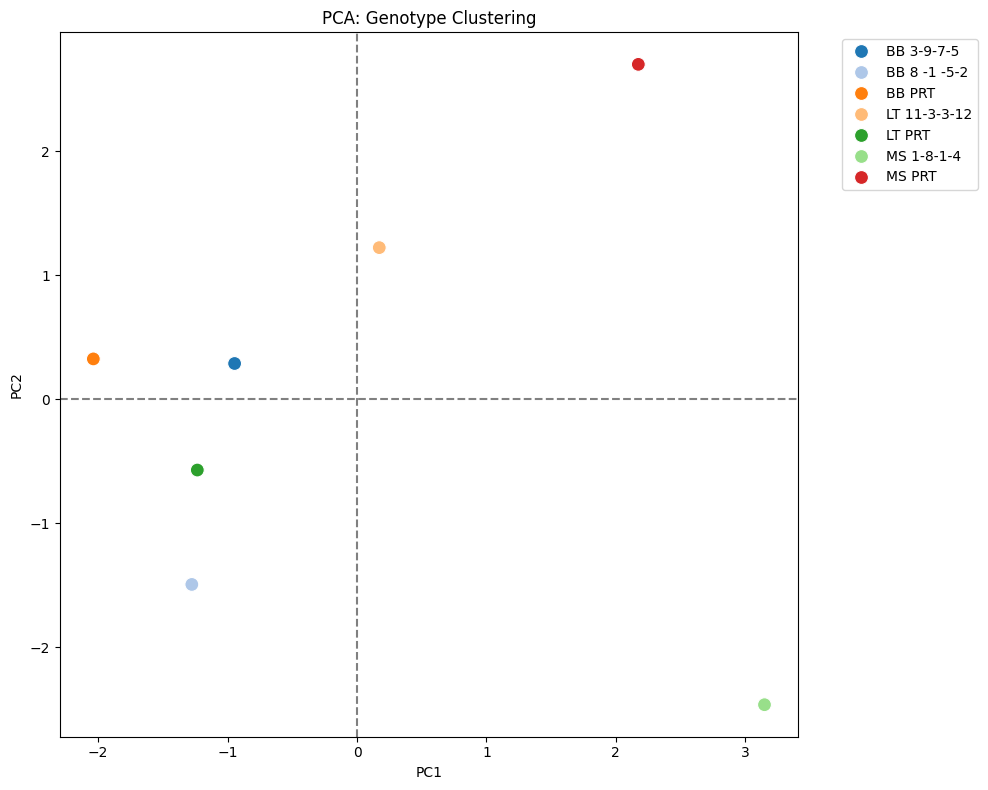

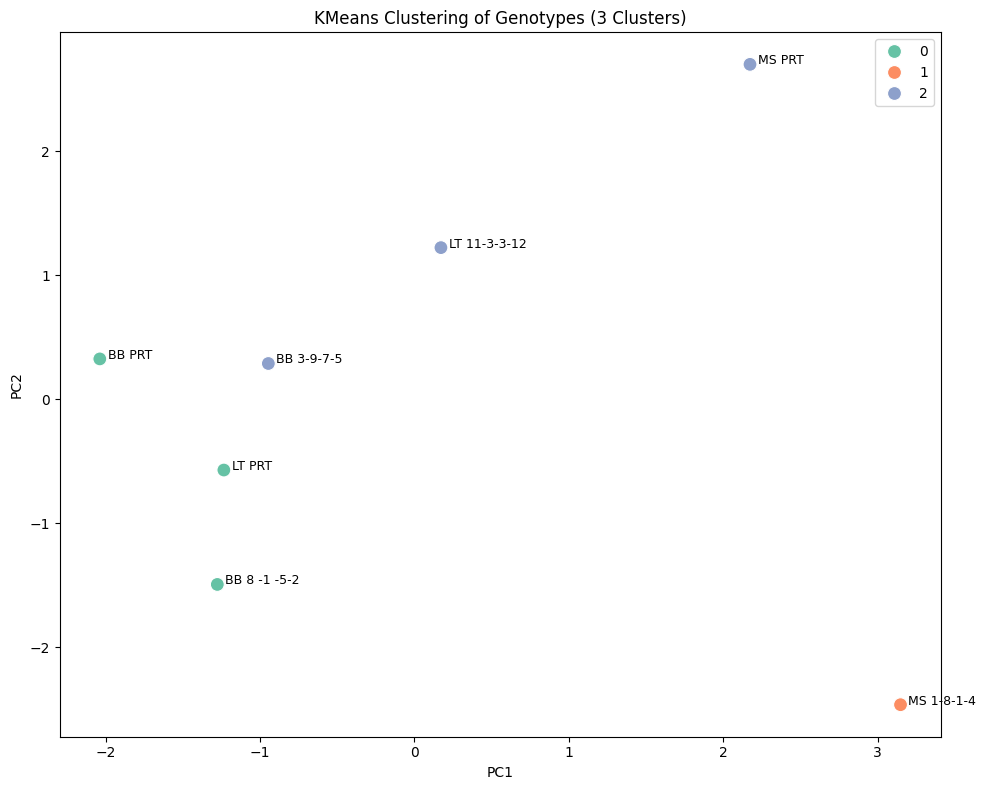


🔍 Linear Regression to Predict GRNY:
R² Score: 1.0
RMSE: 0.0


<ipython-input-22-1524227488>:87: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




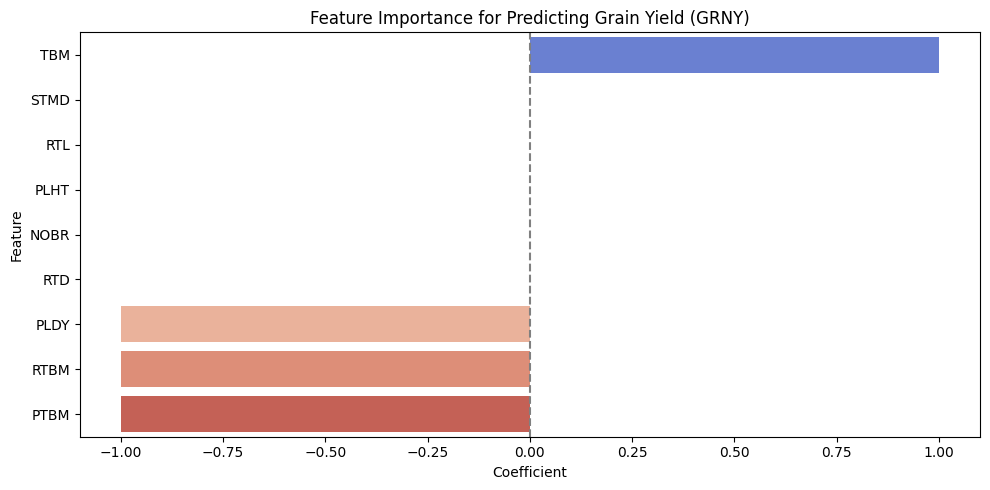

In [ ]:
# @title Kmeans Clustering, PCA, and Prediction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# ----------------------------
# 8. PCA for Genotype Clustering
# ----------------------------
# First, let's define the traits we actually have in our dataset
available_traits = ['NOBR', 'PLHT', 'STMD', 'RTBM', 'RTD', 'RTL', 'GRNY', 'PLDY', 'PTBM', 'TBM']
available_traits = [trait for trait in available_traits if trait in df.columns]

# Use trait means per genotype (excluding GRNY if it's our target variable)
pca_traits = [trait for trait in available_traits if trait != 'GRNY']
trait_data = df.groupby('GENOTYPE')[pca_traits].mean()

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(trait_data)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Plot PCA
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["GENOTYPE"] = trait_data.index

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="GENOTYPE", palette="tab20", s=100)
plt.title("PCA: Genotype Clustering")
plt.axhline(0, ls="--", color="gray")
plt.axvline(0, ls="--", color="gray")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ----------------------------
# 9. KMeans Clustering of Genotypes
# ----------------------------
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Plot Clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=clusters, palette="Set2", s=100)
for i, txt in enumerate(trait_data.index):
    plt.text(pca_result[i, 0] + 0.05, pca_result[i, 1], txt, fontsize=9)
plt.title("KMeans Clustering of Genotypes (3 Clusters)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()
plt.show()

# ----------------------------
# 10. Multiple Linear Regression: Predict GRNY
# ----------------------------
# Features: Use only available traits that aren't our target
if 'GRNY' in df.columns:
    # Exclude GRNY and any other non-numeric columns
    features = [trait for trait in available_traits if trait != 'GRNY' and trait not in ['GENOTYPE', 'P', 'M']]

    X = df[features]
    y = df['GRNY']

    # Train model
    reg = LinearRegression()
    reg.fit(X, y)
    y_pred = reg.predict(X)

    # Evaluation
    print("\n🔍 Linear Regression to Predict GRNY:")
    print("R² Score:", round(r2_score(y, y_pred), 3))
    print("RMSE:", round(np.sqrt(mean_squared_error(y, y_pred)), 3))


    # Coefficients
    coeff_df = pd.DataFrame({
        "Feature": X.columns,
        "Coefficient": reg.coef_
    }).sort_values("Coefficient", ascending=False)

    # Plot Coefficients
    plt.figure(figsize=(10, 5))
    sns.barplot(data=coeff_df, x="Coefficient", y="Feature", palette="coolwarm")
    plt.title("Feature Importance for Predicting Grain Yield (GRNY)")
    plt.axvline(0, color='gray', linestyle='--')
    plt.tight_layout()
    plt.show()
else:
    print("GRNY column not found in dataset - cannot perform regression analysis")